# A Simple Tutorial of Parareal Algorithm

<div style="text-align: right"> --- Demonstration with Jupyter notebook </div> 
<div style="text-align: center"><b> Xiaozhou Li (University of Electronic Science and Technology of China) </b></div>

## History
The parareal algorithm was first presented by Lions, Maday, Turinici in 2001, but unfortunately, the paper was written in French.  The term "parareal" comes from words "parallel" and "real" (real time problem).   

## Problem
### The Initial Value Problem
Consider the initial value problem:
\begin{align}
    u'(t) & = f(t,u(t)),\qquad t \in [0, T], \\
    u(0) & = u_0.
\end{align}
- It is clear that the solution $u$ later in time is affected (determined in this IVP).
- It is actual a serial problem.
- The purpose of parallel in time algorithms is to obtain the solution faster than sequential, but not necessarily scalability or efficiency. 

### Notations
To describe numerical approximations of the IVP, in general, we divide the time interval 
$[0,T]$ into $N$ subintervals such that 
$$
    0 = t_0 < t_1 < \cdots < t_N = T,
$$
and $\Delta t_n = t_{n+1} - t_n = T/N$.

To describe the parareal algorithm, we denote the two numerical approximation methods by $\mathcal{G}$ (coarse) propagator and $\mathcal{F}$ (fine propagator).  Both $\mathcal{G}$ and $\mathcal{F}$ propagate an initial value $u_n$ to $u_{n+1}$ by approximating the solution of the IVP from $t_n$ to $t_{n+1}$.  That is 
$$
    u_{n+1} = \mathcal{G}(t_n, t_{n+1}, u_n)\qquad or \qquad u_{n+1} = \mathcal{F}(t_n, t_{n+1}, u_n),
$$
by solving 
\begin{align}
    u'(t) & = f(t,u(t)),\qquad t \in [t_n, t_{n+1}], \\
    u(t_n) & = u_n,
\end{align}
with propagator $\mathcal{G}$ or $\mathcal{F}$. 

The propagators need satisfy the basic rules:
- coarse propagator $\mathcal{G}$: inaccurate, computationally very cheap.
- fine propagator $\mathcal{F}$: very accurate, but computationally very expensive.
- of course, propagator $\mathcal{G}$ and $\mathcal{F}$ have to satisfy certain relations for stability purpose.


#### Example 1
Considering a simple IVP problem that 
\begin{align}
        u'(t) & = (1 - 2t) u(t),\qquad 0 \leq t \leq 3,\\
        u(0) & = 1.
\end{align}
The exact solution is $u(t) = e^{t - t^2}$.  

- First, we divide interval $[0, 3]$ into $5$ equal subinterval $0 = t_0 < \cdots < t_5 = 3$, $t_n = n$ for $n = 0,\ldots,5$.  
- Then, from $t_n$ to $t_{n+1}$ we can choose 
    - $1$ step Euler method as the coarse propagator $\mathcal{G}$
    - $20$ steps Euler method as the fine propagator $\mathcal{F}$.  
- Clearly, the fine propagator $\mathcal{F}$ is $20$ times more expensive than the coarse propagator $\mathcal{G}$, but much more accurate. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output, display

In [2]:
def fun(t, u):
    return (1 - 2*t)*u

def u_ex(t):
    return np.exp(t - t**2)

def ExEuler(u0, t0, tn, n, RHS):
    # Explicit Euler methods from t0 to tn with initial value u0, number of steps = n, RHS(t,u) = fun(t,u)
    dt = (tn - t0)/n
    t = np.linspace(t0, tn, n+1)
    u = np.zeros(n+1) + u0
    for j in range(n):
        u[j+1] = u[j] + dt*RHS(t[j], u[j])
    return u[n]

def ImEuler(u0, t0, tn, n, RHS):
    dt = (tn - t0)/n
    t = np.linspace(t0, tn, n+1)
    u = np.zeros(n+1) + u0
    for j in range(n):
        u[j+1] = u[j]/(1 - dt*(1 - 2*t[j]))
    return u[n]
    
def draw_fun(t0, tn, N, fun):
    t = np.linspace(t0,tn,N+1)
    u = np.zeros(N+1)
    for i in range(N+1):
        u[i] = fun(t[i])
    plt.plot(t, u, 'k-', linewidth=2, label='exact')


u0 = 1.    
t0 = 0.
tN = 3.
N = 5

t = np.linspace(t0, tN, N+1)
u = np.zeros(N+1) + u0

def draw_propagators(n_coarse, n_fine, RHS):
    fig=plt.figure(figsize=(12,9))
    plt.ylim(-0.2, 1.8)
    draw_fun(t0, tN, 100, u_ex)
    
    err = np.zeros(N+1) 
    for j in range (N):
        u[j+1] = ExEuler(u[j], t[j], t[j+1], n_coarse, fun)
        #u[j+1] = ImEuler(u[j],t[j],t[j+1],n_coarse,fun)
        err[j+1] = np.abs(u_ex(t[j+1]) - u[j+1])
    plt.plot(t,u,'*',linewidth=2,label='coarse')
    print ('coarse propagator error: ', np.max(err))
    
    for j in range(N):
        u[j+1] = ExEuler(u[j],t[j],t[j+1],n_fine,fun)
        #u[j+1] = ImEuler(u[j],t[j],t[j+1],n_fine,fun)
        err[j+1] = np.abs(u_ex(t[j+1]) - u[j+1])
    plt.plot(t,u,'o',linewidth=2,label='fine')
    print ('fine propagator error:   ', np.max(err))
    plt.legend(fontsize=15)
    plt.show()

# interact or interactive with display
#interact(draw_propagators, n_coarse=(1,5), n_fine=(5,40))
w = interactive(draw_propagators, n_coarse=widgets.IntSlider(min=1,max=5,value=1), \
                n_fine=widgets.IntSlider(min=5,max=100,step=5,value=20), RHS=fixed(fun))
display(w)

interactive(children=(IntSlider(value=1, description='n_coarse', max=5, min=1), IntSlider(value=20, descriptio…

## The Parareal Algorithm 
### The Basic Idea 
The basic idea of many parallel in time algorithms, since Nievergelt (1964), is 
- prediction
- correction 
and so does the parareal algorithem. 

### Parareal Algorithm
1. __(SERIAL)__ Initialize the perdiction $u^0_n$ by computing an approximation in serial with the coarse propagator $\mathcal{G}$,
$$
    u^0_{n+1} = \mathcal{G}(t_n, t_{n+1}, u_n^0),
$$
from $n = 0,\ldots,N-1$ with $u_0^0 = u_0$ __(SERIAL)__.
2. <font color=red>__(Parallel)__</font> Computing the correction term by using the fine propagator $\mathcal{F}$ with the initial values given by previous iteration: 
$$
    \mathcal{F}(t_n, t_{n+1}, u^k_n)
$$
in parallel with $N$ cores. <font color=red>__(Parallel)__</font>
3. __(SERIAL)__ Computing the new value with the correction term, 
$$
    u^{k+1}_{n+1} = \mathcal{G}(t_n, t_{n+1}, u_n^{k+1}) + \mathcal{F}(t_n, t_{n+1}, u^k_n) - \mathcal{G}(t_n, t_{n+1}, u^k_n)
$$
in serial. __(SERIAL)__
4. Repeating step 2 and 3 for $k = 0,\ldots$ until the desired accuracy is achieved.



### A Stey by Stey Demonstration
Considering the previous Example 1, but now using the parareal algorithm.

#### Step 1: Perdiction (in serial)
- For each subinterval $[t_n, t_{n+1}]$ for $n = 0,\ldots,4$, using $M_c$ steps explicit Euler Method as the coarse propagator, that is, start with the initial value, $u_0^0 = u_0$. 
- For $n = 0,\ldots, N-1$:
    - $u_{n,0} = u_n^0$;
    - For $m = 0, \ldots, M_c-1$:
        - $t_{n,m} = t_n + \frac{m\Delta t_n}{M_c}$,
        - $u_{n,m+1} = u_{n,m} + \frac{\Delta t_n}{M_c}f(t_{n,m},u_{n,m+1}).$
    - $u_{n+1}^0 = u_{n,M}$.

In [3]:
n_coarse = 0
def draw_propagator_prediction(Mc, RHS):
    fig=plt.figure(figsize=(12,9))
    plt.ylim(-0.2, 1.8)
    draw_fun(t0, tN, 100, u_ex)
    
    err = np.zeros(N+1) 
    for j in range (N):
        u[j+1] = ExEuler(u[j], t[j], t[j+1], Mc, fun)
        #u[j+1] = ImEuler(u[j],t[j],t[j+1],n,fun)
        err[j+1] = np.abs(u_ex(t[j+1]) - u[j+1])
    plt.plot(t,u,'b*',linewidth=2)
    print ('prediction error: ', np.max(err))
    plt.show()
    return Mc
    
w = interactive(draw_propagator_prediction, Mc=widgets.IntSlider(min=1,max=5,value=1), RHS=fixed(fun))
display(w)
Mc = w.result

print ("Now we have the prediction values can be used as initial values for the parallel computing!")
print (u)

interactive(children=(IntSlider(value=1, description='Mc', max=5, min=1), Output()), _dom_classes=('widget-int…

Now we have the prediction values can be used as initial values for the parallel computing!
[ 1.         1.6        1.408      0.22528   -0.1261568  0.1614807]


#### Step 2: Computing the Fine Propagator  (in parallel)
- Distribute the prediction values $u_n^k$ ($n = 0,\ldots, N-1$) to $N$ different cores.  
- Each core only needs to compute the fine propagator $\mathcal{F}$ for subinterval $[t_n, t_{n+1}]$ with inital value $u_{n,0} = u_n^k$. 
- Here, for the fine propagator $\mathcal{F}$, we use $M_f$ (of course, $M_f > M_c$, or better $M_f >> M_c$) steps explicit Euler Method.  
- Then, computing $\mathcal{F}(t_n, t_{n+1}, u^k_n)$ in parallel.  That is 
    - For $m = 0, \ldots, M_f-1$:
         - $t_{n,m} = t_n + \frac{m\Delta t_n}{M_f}$,
         - $u_{n,m+1} = u_{n,m} + \frac{\Delta t_n}{M_f}f(t_{n,m},u_{n,m+1}).$
    - $\mathcal{F}(t_n, t_{n+1}, u^k_n) = u_{n,M}$.
- __Note: __ In this step, we can actually compute $\mathcal{G}(t_n, t_{n+1}, u^k_n)$ in parallel too, but the difference is quite slight.

In [4]:
u_fine = np.zeros([N+1,6])
def draw_propagator_parallel(process, Mf, RHS):
    # parameter i, [0%, 20%, 40%, 60%, 80%, 100%], describes the process
    # It is only for demonstration purpose, no needs for real implementation.
    fig=plt.figure(figsize=(12,9))
    plt.ylim(-0.2, 1.8)
    draw_fun(t0, tN, 100, u_ex)
    plt.plot(t,u,'b*',linewidth=2)
    i = round(process*5)
    u_old = np.copy(u)
    for j in range (N):
        u_fine[j,0] = u_old[j]
        tm = np.linspace(t[j], t[j+1], 6)
        for m in range (i):
            u_fine[j,m+1] = ExEuler(u_fine[j,m], tm[m], tm[m+1], round(Mf*0.2), fun)
            #u_fine[j,m+1] = ImEuler(u_fine[j,m], tm[m], tm[m+1], round(n*process), fun)
        if (i > 0): plt.plot(tm[1:i+1], u_fine[j,1:i+1], 'ro', linewidth=2)
    #if (i == 5)
        #print ('prediction error: ', np.max(err))
    plt.show()
    return Mf
    
w = interactive(draw_propagator_parallel, process=widgets.FloatSlider(min=0,max=1,step=0.2, value=1),\
                Mf=widgets.IntSlider(min=5,max=100,step=5, value=20), RHS=fixed(fun))
display(w)
Mf = w.result

interactive(children=(FloatSlider(value=1.0, description='process', max=1.0, step=0.2), IntSlider(value=20, de…

#### Step 3: Computing the Correction  (in serial)
- Computing the new value by adding the correction between the coarse propagator $\mathcal{G}$ and the fine propagator $\mathcal{F}$:
$$
    u^{k+1}_{n+1} = \mathcal{G}(t_n, t_{n+1}, u_n^{k+1}) + \mathcal{F}(t_n, t_{n+1}, u^k_n) - \mathcal{G}(t_n, t_{n+1}, u^k_n)
$$

corrected error:  0.1517891805059007


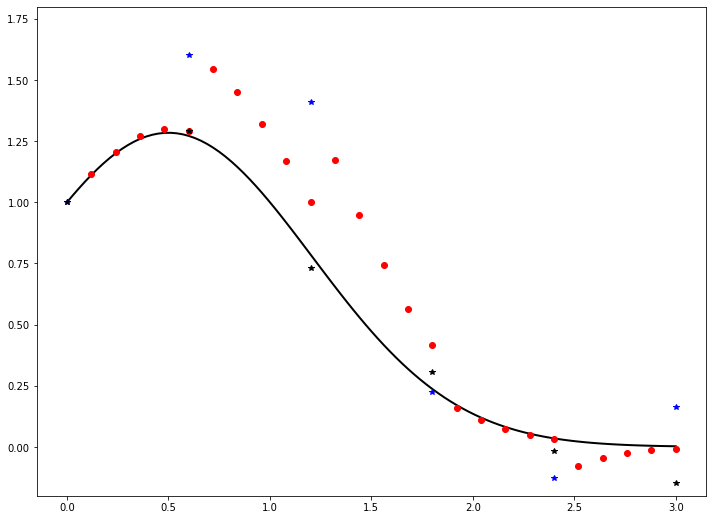

In [5]:
def draw_propagator_correction():
    fig=plt.figure(figsize=(12,9))
    plt.ylim(-0.2, 1.8)
    draw_fun(t0, tN, 100, u_ex)
    plt.plot(t,u,'b*',linewidth=2)
    u_old = np.copy(u)
    err = np.zeros(N+1)
    for j in range (N):
        tm = np.linspace(t[j], t[j+1], 6)
        u[j+1] = ExEuler(u[j], t[j], t[j+1], Mc, fun) + u_fine[j,5] - ExEuler(u_old[j], t[j], t[j+1], Mc, fun)
        plt.plot(tm[1:], u_fine[j,1:], 'ro', linewidth=2)
        err[j+1] = np.abs(u_ex(t[j+1]) - u[j+1])
    print ('corrected error: ', np.max(err))
    plt.plot(t,u,'k*',linewidth=2)
    plt.show()
    
draw_propagator_correction()

#### Step 4: Repeating Step 2 and Step 3.
- Repeating step 2 and step 3 for $k = 1, \ldots,$ until the desired accuracy is obtained.
- Note: the final accuracy is bounded by the accuracy of the fine propagator.

In [6]:
def draw_parareal_iteration(iters):
    fig=plt.figure(figsize=(12,9))
    plt.ylim(-0.2, 1.8)
    draw_fun(t0, tN, 100, u_ex)
    err = np.zeros(N+1)
    if (iters == 1): 
        plt.plot(t,u_fine[:,0],'b*',linewidth=2)
        for j in range (N):
            tm = np.linspace(t[j], t[j+1], 6)
            plt.plot(tm[1:], u_fine[j,1:], 'ro', linewidth=2)
            err[j+1] = np.abs(u_ex(t[j+1]) - u[j+1])
    else:
        plt.plot(t,u,'b*',linewidth=2)
        u_old = np.copy(u)
        
        # computing the fine approximation in parallel
        for j in range (N):
            u_fine[j,0] = u_old[j]
            tm = np.linspace(t[j], t[j+1], 6)
            for m in range (5):
                u_fine[j,m+1] = ExEuler(u_fine[j,m], tm[m], tm[m+1], round(Mf*0.2), fun)
            plt.plot(tm[1:], u_fine[j,1:], 'ro', linewidth=2)
        
        # correction in serial
        for j in range (N):
            u[j+1] = ExEuler(u[j], t[j], t[j+1], Mc, fun) + u_fine[j,5] - ExEuler(u_old[j], t[j], t[j+1], Mc, fun)
            err[j+1] = np.abs(u_ex(t[j+1]) - u[j+1])
    print ('corrected error: ', np.max(err))
    plt.plot(t,u,'k*',linewidth=2)
    plt.show()
    
w = interactive(draw_parareal_iteration, iters=widgets.IntSlider(min=1,max=10,step=1, value=1))
display(w)

interactive(children=(IntSlider(value=1, description='iters', max=10, min=1), Output()), _dom_classes=('widget…

### A Clear Code

In [7]:
def parareal(N, Mc, Mf, iters):
    fig=plt.figure(figsize=(4,3))
    plt.ylim(-0.2, 1.8)
    draw_fun(t0, tN, 100, u_ex)
    
    u = np.zeros(N+1) + u0
    t = np.linspace(t0, tN, N+1)
    u_fine = np.zeros([N+1,6])
    err = np.zeros(N+1)
    # fine propagator
    for j in range(N):
        u[j+1] = ExEuler(u[j],t[j],t[j+1],Mf,fun)
        #u[j+1] = ImEuler(u[j],t[j],t[j+1],n_fine,fun)
        err[j+1] = np.abs(u_ex(t[j+1]) - u[j+1])
    plt.plot(t,u,'o',linewidth=2,label='fine')
    print ('fine propagator error:   ', np.max(err))
    
    # prediction
    for j in range (N):
        u[j+1] = ExEuler(u[j], t[j], t[j+1], Mc, fun)
        #u[j+1] = ImEuler(u[j],t[j],t[j+1],n,fun)
        err[j+1] = np.abs(u_ex(t[j+1]) - u[j+1])
    plt.plot(t,u,'b*',linewidth=2, label='prediction')
    print ('prediction error: ', np.max(err))
    
    for i in range (iters):
        u_old = np.copy(u)
        
        # computing the fine approximation in parallel
        for j in range (N):
            u_fine[j,0] = u_old[j]
            tm = np.linspace(t[j], t[j+1], 6)
            for m in range (5):
                u_fine[j,m+1] = ExEuler(u_fine[j,m], tm[m], tm[m+1], round(Mf*0.2), fun)
            #plt.plot(tm[1:], u_fine[j,1:], 'ro', linewidth=2)
        
        # correction in serial
        for j in range (N):
            u[j+1] = ExEuler(u[j], t[j], t[j+1], Mc, fun) + u_fine[j,5] - ExEuler(u_old[j], t[j], t[j+1], Mc, fun)
            err[j+1] = np.abs(u_ex(t[j+1]) - u[j+1])
    plt.plot(t,u,'*',linewidth=2, label='parareal')
    print ('parareal error: ', np.max(err))
    plt.legend()
    plt.show()
    
    
w = interactive(parareal, N=widgets.IntSlider(min=5,max=100,step=5,value=5), \
                Mc=widgets.IntSlider(min=1,max=5,value=1), \
                Mf=widgets.IntSlider(min=5,max=100,step=5,value=20),\
                iters=widgets.IntSlider(min=0,max=10,value=0))
display(w)

interactive(children=(IntSlider(value=5, description='N', min=5, step=5), IntSlider(value=1, description='Mc',…

### Features
- Arbitrary order of accuracy, depends on the total number of iterations and the accuracy order of the coarse propagator G.
- It is a predictor corrector parallel algorithm.
- It can be combined with other iterative process, such as domain decomposition, multigrid, etc.
- Ideally, the algorithm needs for one processor for each subinterval.
- Stability issue becomes more complicated, the stability of the coarse and fine propagators need satisfy some restrictions.

